In [1]:
##Setting the enviromment: 

#1# Useful: 
import pandas as pd  #panda library
import numpy as np   #numpy library
import missingno as msno # data cleaning
import psycopg2   # 
from sqlalchemy import create_engine  #
import os
from dotenv import load_dotenv    # 

#2# Data visualization: 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Setting the data frame: 
load_dotenv()

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)
cur = conn.cursor()
query_string = "SELECT ks.price , kd.zipcode, kd.yr_built, ks.date, ks.house_id, kd.sqft_living, kd.sqft_lot15,ks.house_id  FROM eda.king_county_house_details kd FULL JOIN eda.king_county_house_sales ks ON ks.house_id  = kd.id "
df_task_01 = pd.read_sql(query_string, conn)
df_task_01.to_csv('data/eda.csv',index=False)
conn.close()


C:\Users\Giu\AppData\Local\Temp\ipykernel_1436\3167208934.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_task_01 = pd.read_sql(query_string, conn)


In [44]:
##Cleaning and organizing the data: 

df_task_01 = pd.read_csv('data/eda.csv')
#df_task_01.duplicated().value_counts()  --> first check on duplicates 
df_task_01 = df_task_01.drop_duplicates()
df_task_01.columns.drop_duplicates()
df_task_01.drop(df_task_01.columns[[-1]], axis=1, inplace=True)
df_task_01.reset_index(inplace=True, drop=True)

df_task_01.fillna(0, inplace=True)  ##--> making sure I won't have a NaN

df_task_01.columns  ##-->checking the colummn names for the next questions

#df_task_01.tail()

,price,zipcode,yr_built,date,house_id,sqft_living,sqft_lot15
21592,360000.0,98103,2009,2014-05-21,263000018,1530.0,1509.0
21593,400000.0,98146,2014,2015-02-23,6600060120,2310.0,7200.0
21594,402101.0,98144,2009,2014-06-23,1523300141,1020.0,2007.0
21595,400000.0,98027,2004,2015-01-16,291310100,1600.0,1287.0
21596,325000.0,98144,2008,2014-10-15,1523300157,1020.0,1357.0


<Axes: >

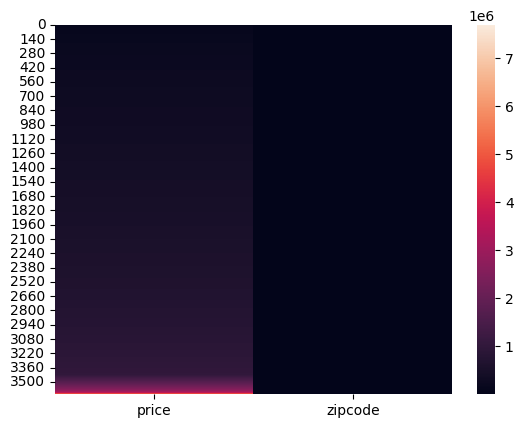

In [56]:
###Questions: 

#1# "Which are the most noble areas?"
zipcodes_check = df_task_01.groupby(["zipcode"]).nunique()

noble_areas = df_task_01.groupby(["price"])["zipcode"].count().reset_index()
noble_areas
zipcodes_check

sns.heatmap(noble_areas)